In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlb-pitch-data-20152018/pitches.csv
/kaggle/input/mlb-pitch-data-20152018/atbats.csv
/kaggle/input/mlb-pitch-data-20152018/games.csv
/kaggle/input/mlb-pitch-data-20152018/2019_games.csv
/kaggle/input/mlb-pitch-data-20152018/2019_atbats.csv
/kaggle/input/mlb-pitch-data-20152018/2019_pitches.csv
/kaggle/input/mlb-pitch-data-20152018/player_names.csv
/kaggle/input/mlb-pitch-data-20152018/ejections.csv


In [4]:
data_raw = pd.read_csv('/kaggle/input/mlb-pitch-data-20152018/pitches.csv')
# Print out size, shape, and column names
print("size: " + str(data_raw.size))
print("shape: " + str(data_raw.shape))
print("columns: " + str(data_raw.columns))

size: 114686160
shape: (2867154, 40)
columns: Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')


In [5]:
df = data_raw
# dropping useless columns and rows with null values
df.drop(["nasty", "zone", "type_confidence", "pitch_type", "ab_id", "event_num"], axis = 1, inplace = True)
df = df.dropna()
print(df.shape)

(2847250, 34)


In [6]:
half_row_num = int(len(df)/50)
sub_set_one = df[:half_row_num]
print(sub_set_one.shape)
sub_set_two = df[30*half_row_num+1:31*half_row_num+1]
print(sub_set_two.shape)
sub_set_three = df[10*half_row_num+1:11*half_row_num+1]
print(sub_set_three.shape)
sub_set_four = df[15*half_row_num+1:16*half_row_num+1]
print(sub_set_four.shape)
sub_set_five = df[25*half_row_num+1:26*half_row_num+1]
print(sub_set_five.shape)

(56945, 34)
(56945, 34)
(56945, 34)
(56945, 34)
(56945, 34)


Things that I have learned from EDA:
1. Start speed has to be >= 60 mph generally to be a strike
2. End Speed has to be >= 60 mph generally to be a strike
3. Nasty is completely irrelevant, any values of nasty has equal potential as any other value to be a strike
4. Zone can be any value besides 10 for a strike to occur
5. Spin Rate is always >= 3500 for a strike to occur
6. All values for Spin Dir result in strike, does not appear to be super useful
7. -2 < px < 2 allows for a strike
8. -1 < pz < 5 allows for a strike
9. Moreorless all values of pfx_x gurantee a strike
10. Moreorless all values of pfx_z gurantee a strike

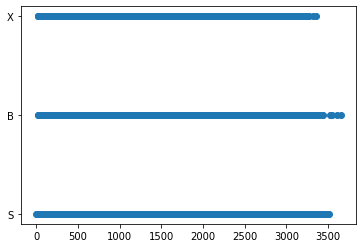

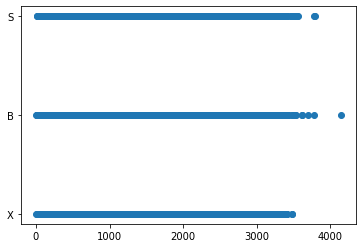

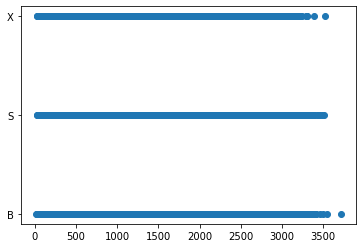

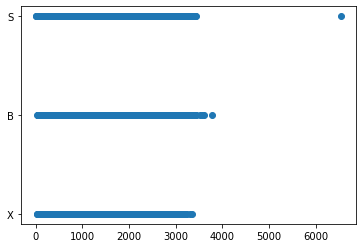

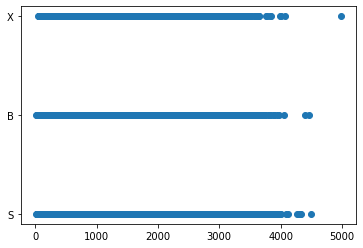

In [11]:
import matplotlib.pyplot as plt

#### Spin Rate EDA
plt.scatter(sub_set_one['spin_rate'], sub_set_one['type'])
plt.show()
plt.scatter(sub_set_two['spin_rate'], sub_set_two['type'])
plt.show()
plt.scatter(sub_set_three['spin_rate'], sub_set_three['type'])
plt.show()
plt.scatter(sub_set_four['spin_rate'], sub_set_four['type'])
plt.show()
plt.scatter(sub_set_five['spin_rate'], sub_set_five['type'])
plt.show()

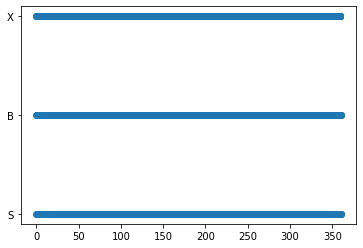

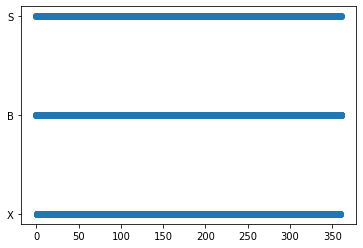

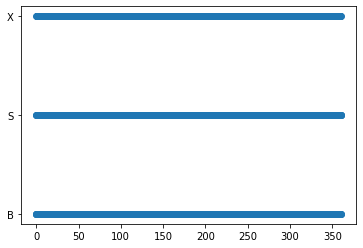

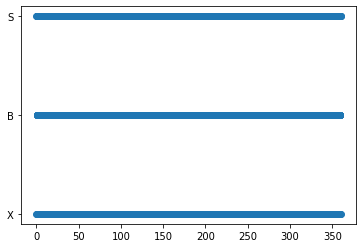

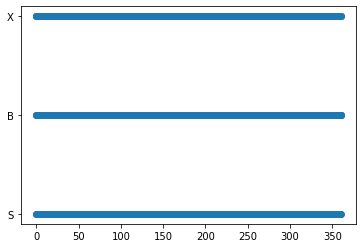

In [7]:
#### Spin Dir EDA
plt.scatter(sub_set_one['spin_dir'], sub_set_one['type'])
plt.show()
plt.scatter(sub_set_two['spin_dir'], sub_set_two['type'])
plt.show()
plt.scatter(sub_set_three['spin_dir'], sub_set_three['type'])
plt.show()
plt.scatter(sub_set_four['spin_dir'], sub_set_four['type'])
plt.show()
plt.scatter(sub_set_five['spin_dir'], sub_set_five['type'])
plt.show()

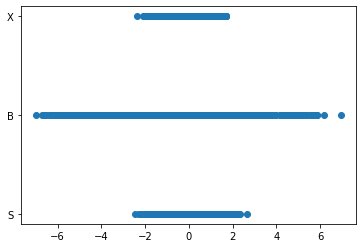

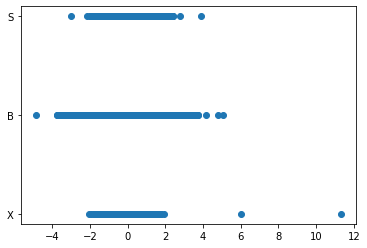

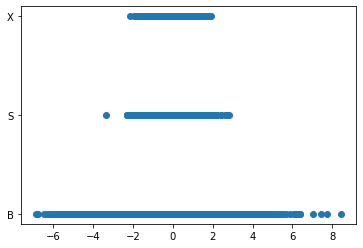

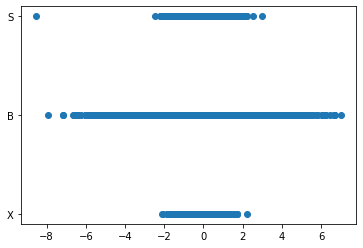

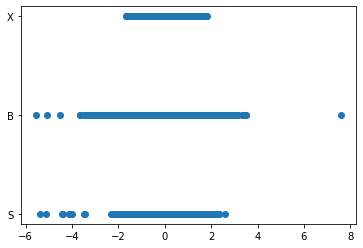

In [11]:
#### px EDA
plt.scatter(sub_set_one['px'], sub_set_one['type'])
plt.show()
plt.scatter(sub_set_two['px'], sub_set_two['type'])
plt.show()
plt.scatter(sub_set_three['px'], sub_set_three['type'])
plt.show()
plt.scatter(sub_set_four['px'], sub_set_four['type'])
plt.show()
plt.scatter(sub_set_five['px'], sub_set_five['type'])
plt.show()

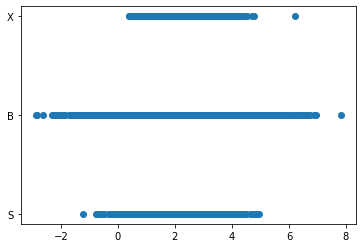

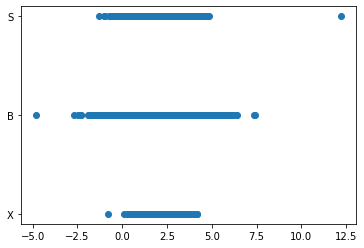

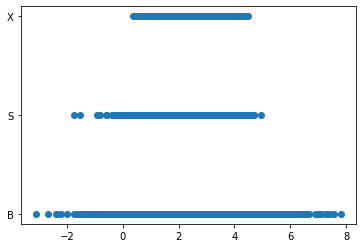

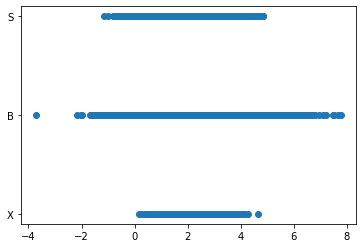

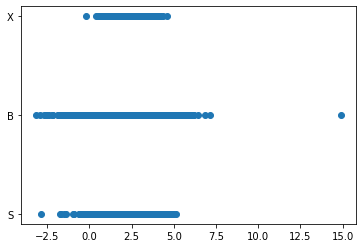

In [7]:
#### pz EDA
plt.scatter(sub_set_one['pz'], sub_set_one['type'])
plt.show()
plt.scatter(sub_set_two['pz'], sub_set_two['type'])
plt.show()
plt.scatter(sub_set_three['pz'], sub_set_three['type'])
plt.show()
plt.scatter(sub_set_four['pz'], sub_set_four['type'])
plt.show()
plt.scatter(sub_set_five['pz'], sub_set_five['type'])
plt.show()

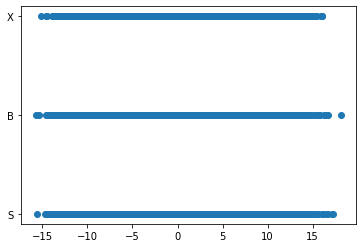

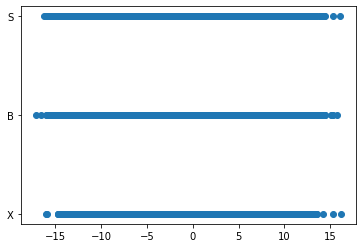

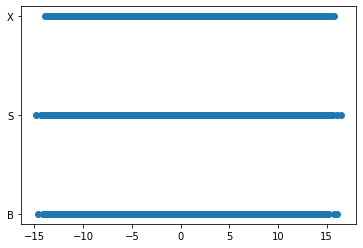

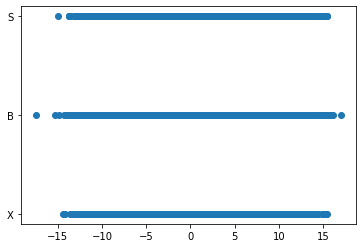

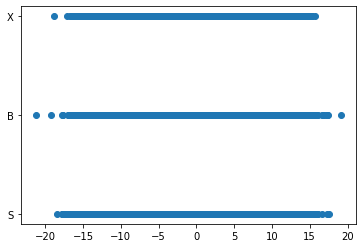

In [8]:
#### pfx_x EDA
plt.scatter(sub_set_one['pfx_x'], sub_set_one['type'])
plt.show()
plt.scatter(sub_set_two['pfx_x'], sub_set_two['type'])
plt.show()
plt.scatter(sub_set_three['pfx_x'], sub_set_three['type'])
plt.show()
plt.scatter(sub_set_four['pfx_x'], sub_set_four['type'])
plt.show()
plt.scatter(sub_set_five['pfx_x'], sub_set_five['type'])
plt.show()

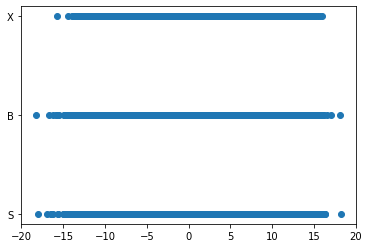

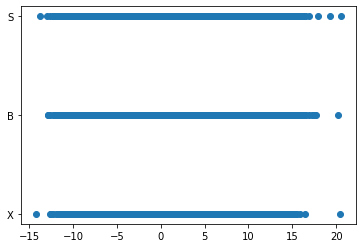

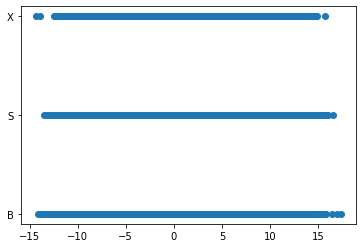

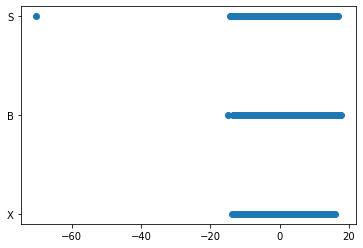

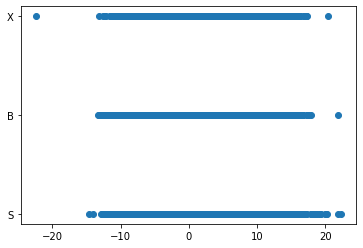

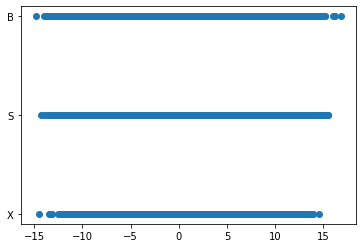

In [13]:
## pfx_z EDA
sub_set_six = df[20*half_row_num+1:21*half_row_num+1]

plt.scatter(sub_set_one['pfx_z'], sub_set_one['type'])
plt.show()
plt.scatter(sub_set_two['pfx_z'], sub_set_two['type'])
plt.show()
plt.scatter(sub_set_three['pfx_z'], sub_set_three['type'])
plt.show()
plt.scatter(sub_set_four['pfx_z'], sub_set_four['type'])
plt.show()
plt.scatter(sub_set_five['pfx_z'], sub_set_five['type'])
plt.show()
plt.scatter(sub_set_six['pfx_z'], sub_set_six['type'])
plt.show()

<AxesSubplot:xlabel='spin_dir', ylabel='type'>

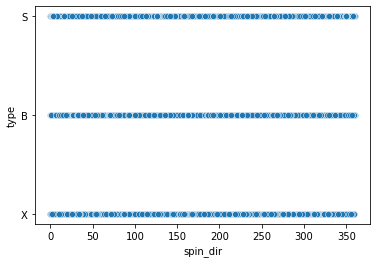

In [9]:
import seaborn as sns

sns.scatterplot(x=sub_set_one['spin_dir'],y=sub_set_one['type'])

In [ ]:
sub_set_one.head()

In [ ]:
sub_set_two.head()

In [ ]:
#df = df[df['type']=='S'] 

In [ ]:
sns.scatterplot(x=sub_set_one['start_speed'],y=sub_set_one['type'])

In [ ]:
sns.scatterplot(x=sub_set_two['start_speed'],y=sub_set_two['type'])

In [ ]:
sns.scatterplot(x=sub_set_three['start_speed'],y=sub_set_three['type'])

In [ ]:
sns.scatterplot(x=sub_set_four['start_speed'],y=sub_set_four['type'])

In [ ]:
sns.scatterplot(x=sub_set_five['start_speed'],y=sub_set_five['type'])

<AxesSubplot:xlabel='end_speed', ylabel='type'>

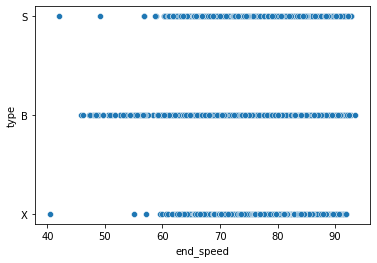

In [10]:
sns.scatterplot(x=sub_set_one['end_speed'],y=sub_set_one['type'])

In [ ]:
sns.scatterplot(x=sub_set_two['end_speed'],y=sub_set_two['type'])

In [ ]:
sns.scatterplot(x=sub_set_three['end_speed'],y=sub_set_three['type'])

In [ ]:
sns.scatterplot(x=sub_set_four['end_speed'],y=sub_set_four['type'])

In [ ]:
sns.scatterplot(x=sub_set_five['end_speed'],y=sub_set_five['type'])

In [ ]:
sns.scatterplot(x=sub_set_one['nasty'],y=sub_set_one['type'])

In [ ]:
sns.scatterplot(x=sub_set_two['nasty'],y=sub_set_two['type'])

In [ ]:
sns.scatterplot(x=sub_set_three['nasty'],y=sub_set_three['type'])

In [ ]:
sns.scatterplot(x=sub_set_four['nasty'],y=sub_set_four['type'])

In [ ]:
sns.scatterplot(x=sub_set_five['nasty'],y=sub_set_five['type'])

In [ ]:
sns.scatterplot(x=sub_set_one['zone'],y=sub_set_one['type'])

In [ ]:
sns.scatterplot(x=sub_set_two['zone'],y=sub_set_two['type'])

In [ ]:
sns.scatterplot(x=sub_set_three['zone'],y=sub_set_three['type'])

In [ ]:
sns.scatterplot(x=sub_set_four['zone'],y=sub_set_four['type'])

In [ ]:
sns.scatterplot(x=sub_set_five['zone'],y=sub_set_five['type'])

In [ ]:
sns.scatterplot(x=sub_set_one['x0'],y=df['type'])

In [ ]:
sns.scatterplot(x=df['y0'],y=df['type'])

In [ ]:
df.break_length

In [ ]:
sns.distplot(df.break_length)